В этом блокноте мы научимся выполнять сглаживание и строить тренд временного ряда.

Для начала загрузим [данные](https://studio.openedu.ru/assets/courseware/v1/f9a98baa4e51f14b5448a7fdca8b125e/asset-v1:ITMOUniversity+DATANTECH2035+fall_2021+type@asset+block/task5_983784.csv) уже привычным нам образом

In [2]:
import pandas as pd
import numpy as np

data_series = pd.read_csv('https://courses.openedu.ru/assets/courseware/v1/3485634dc5fd4834c786b5a3cd5a9a03/asset-v1:ITMOUniversity+DATANTECH2035+fall_2022_2+type@asset+block/task5_447502.csv')

In [3]:
data_series

,y
0,24
1,27
2,31
3,27
4,35
...,...
95,113
96,106
97,103
98,131


В задании нумерация начинается с $1$, а у нас — с $0$. Исправим это, выполнив сдвиг индексов

In [4]:
data_series.index += 1
data_series

,y
1,24
2,27
3,31
4,27
5,35
...,...
96,113
97,106
98,103
99,131


Напишем функцию самостоятельно:

In [5]:
def exponential_smoothing(series, alpha):
    result = [series[0]]
    for index in range(1, len(series)):
        result.append(alpha * series[index] + (1 - alpha) * result[index - 1])
    return result

Проведем сглаживание и запишем результат в столбец <code>y_exp_norm_user</code>

In [6]:
data_series['y_exp_norm_user'] = exponential_smoothing(data_series['y'].to_list(), 0.2)

In [7]:
data_series

,y,y_exp_norm_user
1,24,24.000000
2,27,24.600000
3,31,25.880000
4,27,26.104000
5,35,27.883200
...,...,...
96,113,110.804515
97,106,109.843612
98,103,108.474890
99,131,112.979912


Построим графики исходного и сглаженного рядов

In [8]:
import matplotlib.pyplot as plt

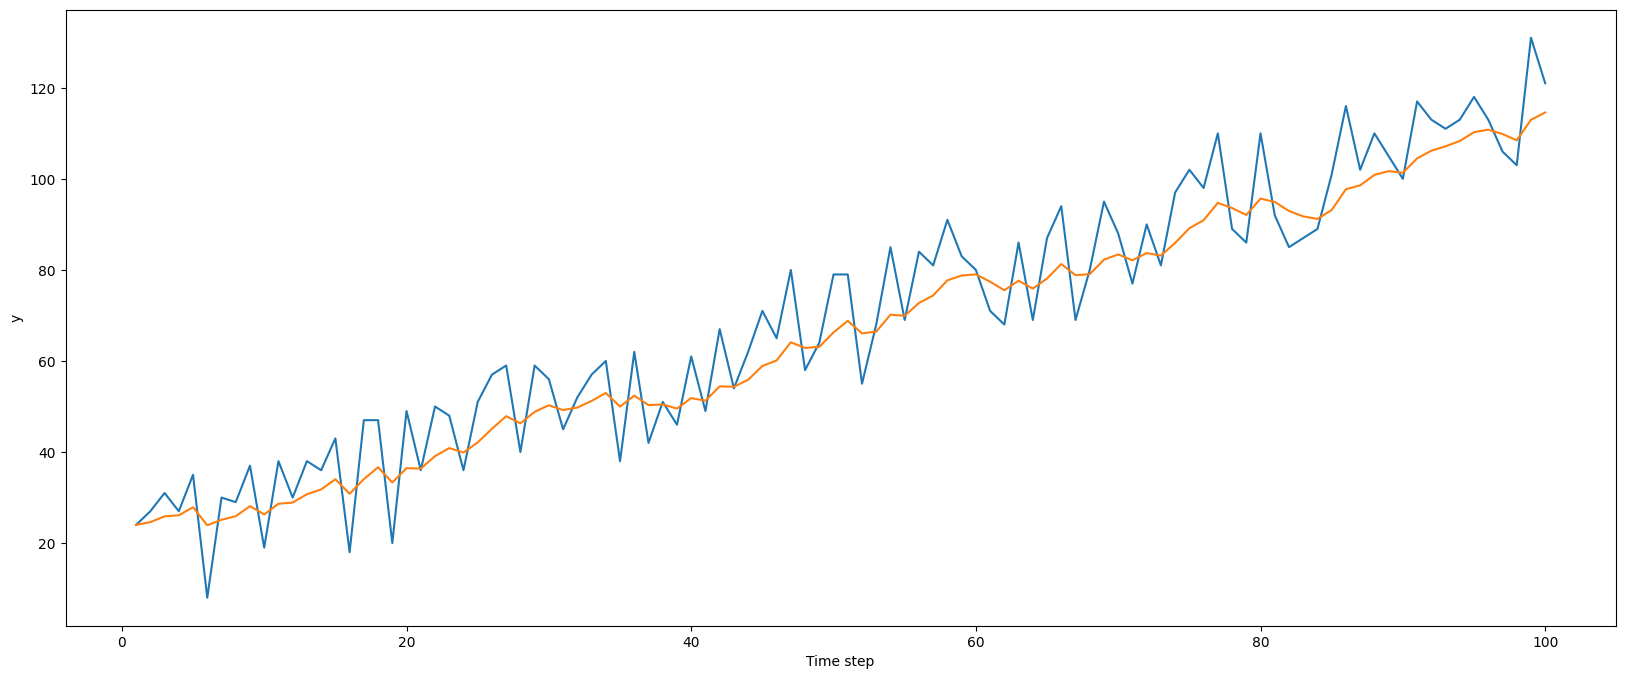

In [9]:
plt.figure(figsize=(20, 8))
plt.plot('y', data = data_series)
plt.plot('y_exp_norm_user', data = data_series)
plt.xlabel('Time step')
plt.ylabel('y')
plt.show()

Выведем 50-ую строку нашего набора данных

In [10]:
data_series.loc[[50]]

,y,y_exp_norm_user
50,79,66.279706


Выведем только 50-ое сглаженное значение

In [11]:
data_series['y_exp_norm_user'].loc[[50]]

50    66.279706
Name: y_exp_norm_user, dtype: float64

Округлим его до сотых

In [12]:
y50 = data_series['y_exp_norm_user'].loc[[50]]
round(y50, 2)

50    66.28
Name: y_exp_norm_user, dtype: float64

Теперь проведем экспоненциальное сглаживание нашего временного ряда, используя функцию <code>ewm</code>. Результат запишем в новый столбец <code>y_exp_norm</code>

In [13]:
data_series['y_exp_norm'] = data_series['y'].ewm(alpha = 0.2, adjust = False).mean()

In [14]:
data_series

,y,y_exp_norm_user,y_exp_norm
1,24,24.000000,24.000000
2,27,24.600000,24.600000
3,31,25.880000,25.880000
4,27,26.104000,26.104000
5,35,27.883200,27.883200
...,...,...,...
96,113,110.804515,110.804515
97,106,109.843612,109.843612
98,103,108.474890,108.474890
99,131,112.979912,112.979912


Построим графики исходного и сглаженного рядов

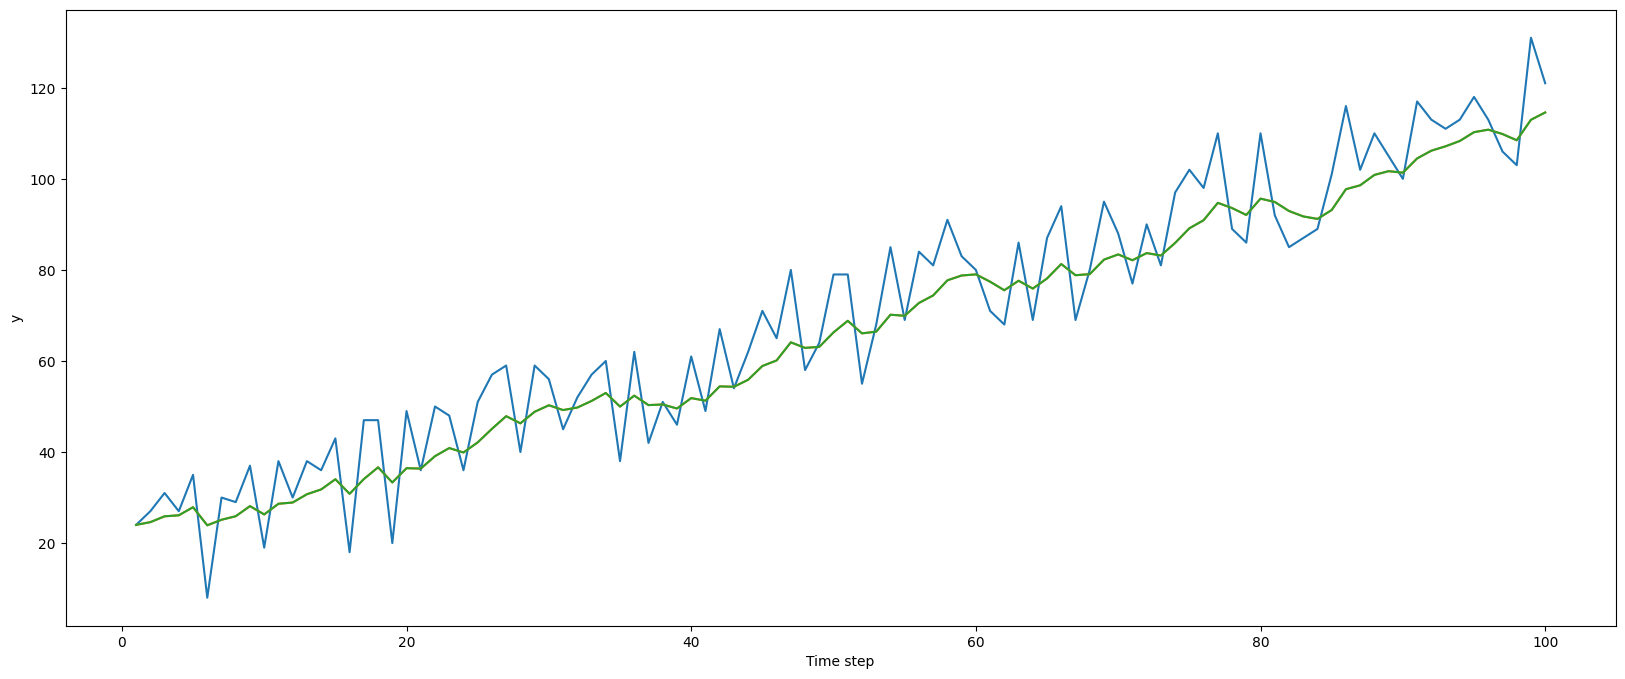

In [15]:
plt.figure(figsize=(20, 8))
plt.plot('y', data = data_series)
plt.plot('y_exp_norm', data = data_series)
plt.plot('y_exp_norm_user', data = data_series)
plt.xlabel('Time step')
plt.ylabel('y')
plt.show()

Сравним результаты

In [16]:
(data_series['y_exp_norm'] == data_series['y_exp_norm_user']).unique()

array([ True])

Рассмотрим отдельно значения временного ряда и соответсвующие им временные метки. Преобразуем тип данных в массив <code>numpy</code>:

In [ ]:
import numpy as np
X = data_series.index.to_numpy()
y = data_series['y'].to_numpy()
X

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])

Найдем уравнение линейного тренда, используя функцию <code>polyfit</code>

In [ ]:
poly = np.polyfit(X, y, 1)
print(poly)

[ 1.34990099 14.08      ]


In [ ]:
a = round(poly[0], 2)
b = round(poly[1], 2)

Найдем значения ряда, используя уравнение тренда

In [ ]:
x = np.arange(1, 101)
data_series['lin_trend'] = a * x + b

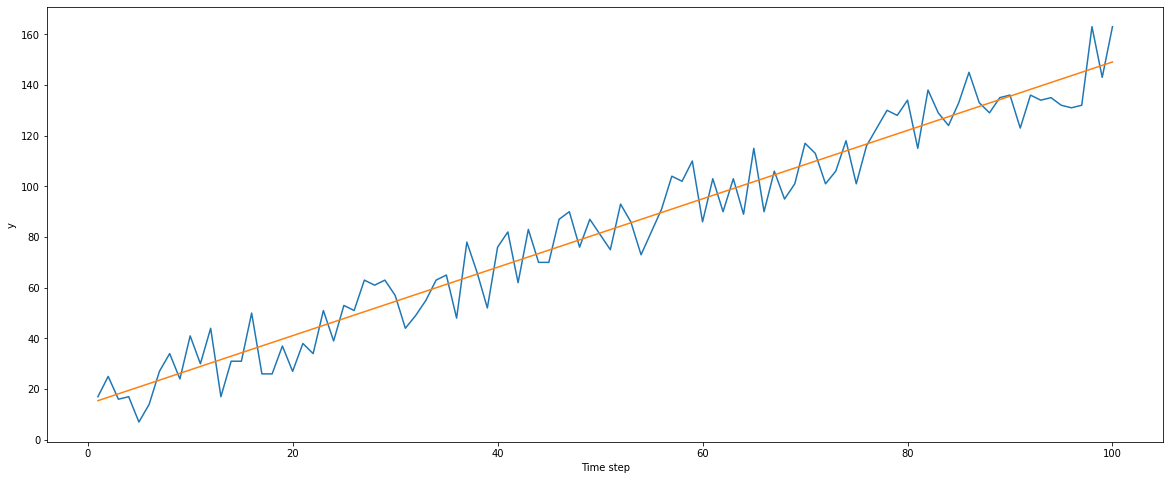

In [ ]:
plt.figure(figsize=(20, 8))
plt.plot('y', data=data_series)
plt.plot('lin_trend', data=data_series)
plt.xlabel('Time step')
plt.ylabel('y')
plt.show()

Вычислим коэффициент детерминации

$R^{2}=1-\frac{\sum\limits_{i=1}^{n}\left(y_{i}-f_{i}\right)^{2}}{\sum\limits_{i=1}^{n}\left(y_{i}-y_{\mathrm{avg}}\right)^{2}}$

In [ ]:
f_i = data_series['lin_trend']
y_avg = data_series['y'].mean()

In [ ]:
R2 = 1 - ((y - f_i) ** 2).sum() / ((y - y_avg) ** 2).sum()

In [ ]:
round(R2, 3)

0.949

Спрогнозируем $101$-ый член ряда

In [ ]:
y_101 = a * 101 + b
round(y_101, 0)

150.0